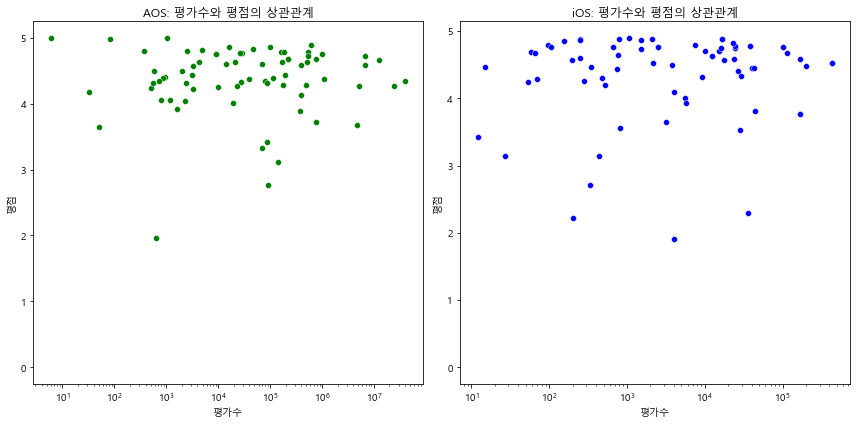

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# AOS와 iOS 데이터를 개별적으로 불러오기
free_aos = pd.read_csv('무료_다운로드_게임_AOS.csv', encoding='euc-kr')
paid_aos = pd.read_csv('유료_다운로드_게임_AOS.csv', encoding='euc-kr')
revenue_aos = pd.read_csv('매출_순위_게임_AOS.csv', encoding='euc-kr')
free_ios = pd.read_csv('무료_다운로드_게임_IOS.csv', encoding='euc-kr')
paid_ios = pd.read_csv('유료_다운로드_게임_IOS.csv', encoding='euc-kr')
revenue_ios = pd.read_csv('매출_순위_게임_IOS.csv', encoding='euc-kr')

# 데이터 합치기
aos_data = pd.concat([free_aos, paid_aos, revenue_aos], ignore_index=True)
ios_data = pd.concat([free_ios, paid_ios, revenue_ios], ignore_index=True)

# 평가수와 평점 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=aos_data, x='평가수', y='평점', color='green')
plt.title('AOS: 평가수와 평점의 상관관계')
plt.xscale('log')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ios_data, x='평가수', y='평점', color='blue')
plt.title('iOS: 평가수와 평점의 상관관계')
plt.xscale('log')
plt.tight_layout()
plt.show()

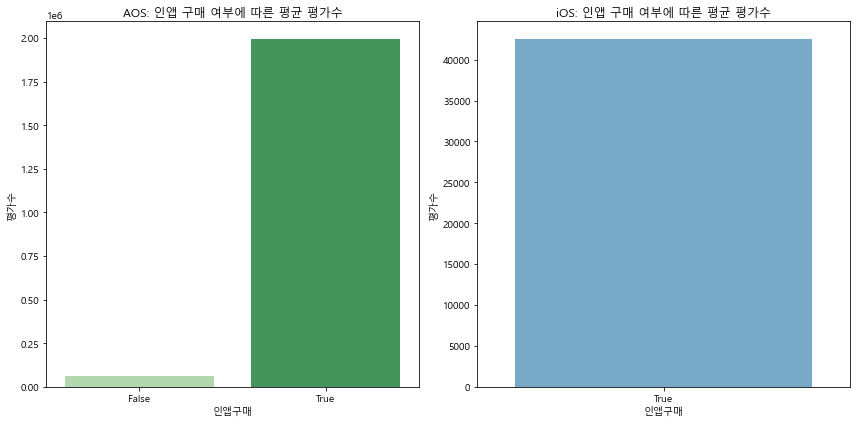

In [2]:
# 인앱 구매 여부에 따른 성과 분석
aos_data['인앱구매'] = aos_data['인앱구매'].replace('인앱 구매', True).replace('없음', False)
ios_data['인앱구매'] = ios_data['인앱구매'].replace('인앱 구매', True).replace('없음', False)

# 인앱 구매 여부에 따른 평균 평가수
aos_inapp = aos_data.groupby('인앱구매')['평가수'].mean().reset_index()
ios_inapp = ios_data.groupby('인앱구매')['평가수'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=aos_inapp, x='인앱구매', y='평가수', palette='Greens')
plt.title('AOS: 인앱 구매 여부에 따른 평균 평가수')

plt.subplot(1, 2, 2)
sns.barplot(data=ios_inapp, x='인앱구매', y='평가수', palette='Blues')
plt.title('iOS: 인앱 구매 여부에 따른 평균 평가수')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'AOS: 장르별 비율')

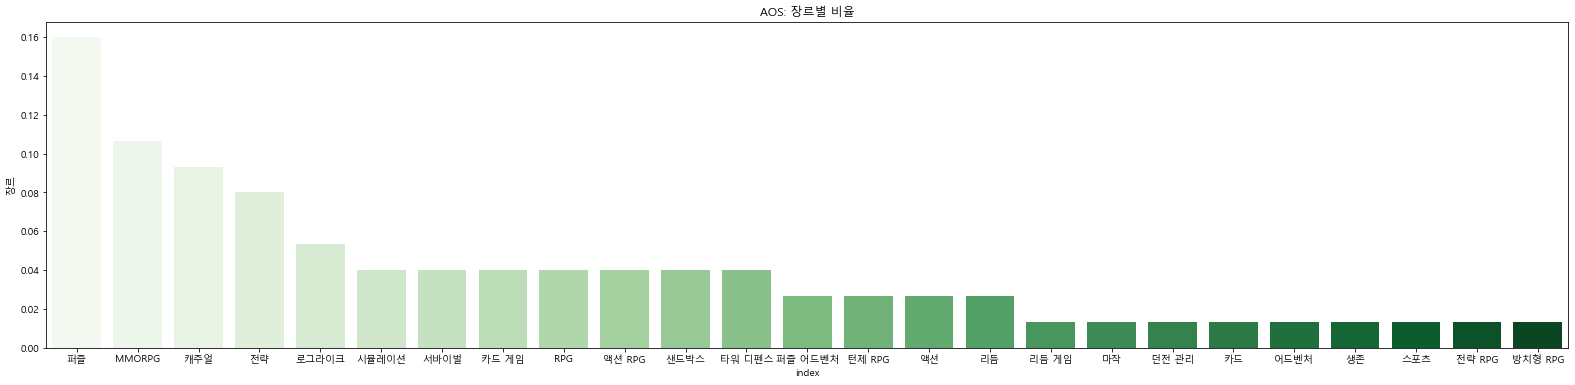

In [13]:
# 장르별 비율 분석
aos_genre = aos_data['장르'].value_counts(normalize=True).reset_index()

plt.figure(figsize=(60, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=aos_genre, x='index', y='장르', palette='Greens')
plt.title('AOS: 장르별 비율')

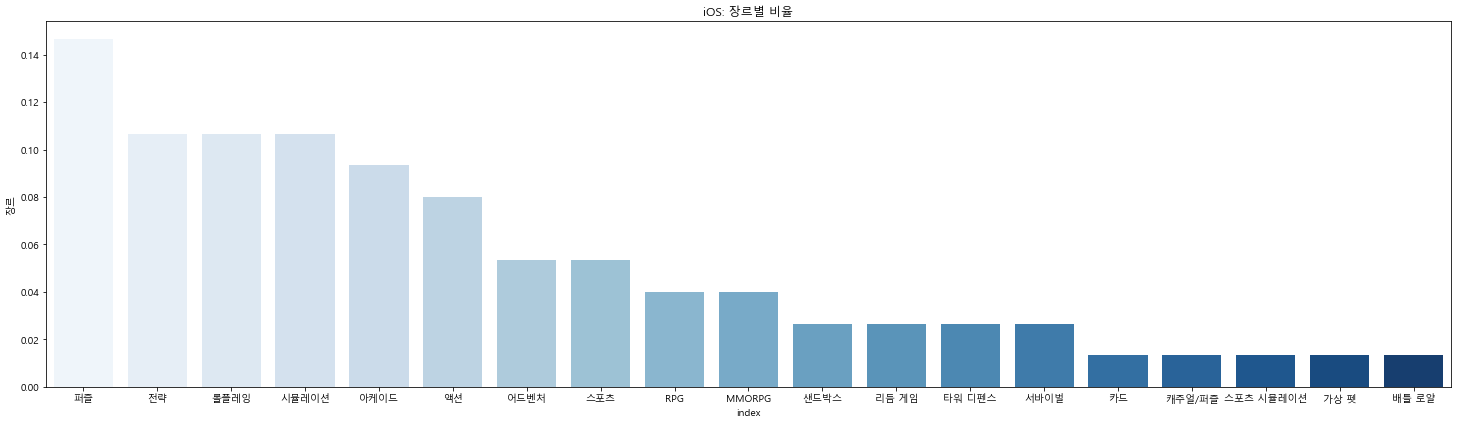

In [12]:
ios_genre = ios_data['장르'].value_counts(normalize=True).reset_index()

plt.figure(figsize=(40, 6))
plt.subplot(1, 2, 2)
sns.barplot(data=ios_genre, x='index', y='장르', palette='Blues')
plt.title('iOS: 장르별 비율')
plt.tight_layout()
plt.show()

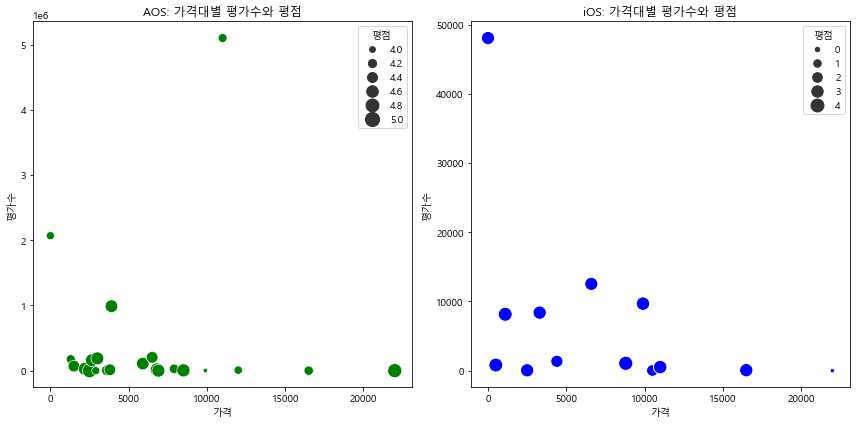

In [5]:
# 가격 정보가 포함된 경우에만 분석
aos_data['가격'] = aos_data['가격'].replace('무료', 0).replace('인앱 구매', 0).apply(pd.to_numeric, errors='coerce')
ios_data['가격'] = ios_data['가격'].replace('무료', 0).replace('인앱 구매', 0).apply(pd.to_numeric, errors='coerce')

# 가격에 따른 평가수와 평점 분석
aos_free_paid = aos_data.groupby('가격').agg({'평가수': 'mean', '평점': 'mean'}).reset_index()
ios_free_paid = ios_data.groupby('가격').agg({'평가수': 'mean', '평점': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=aos_free_paid, x='가격', y='평가수', size='평점', sizes=(20, 200), color='green')
plt.title('AOS: 가격대별 평가수와 평점')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ios_free_paid, x='가격', y='평가수', size='평점', sizes=(20, 200), color='blue')
plt.title('iOS: 가격대별 평가수와 평점')
plt.tight_layout()
plt.show()